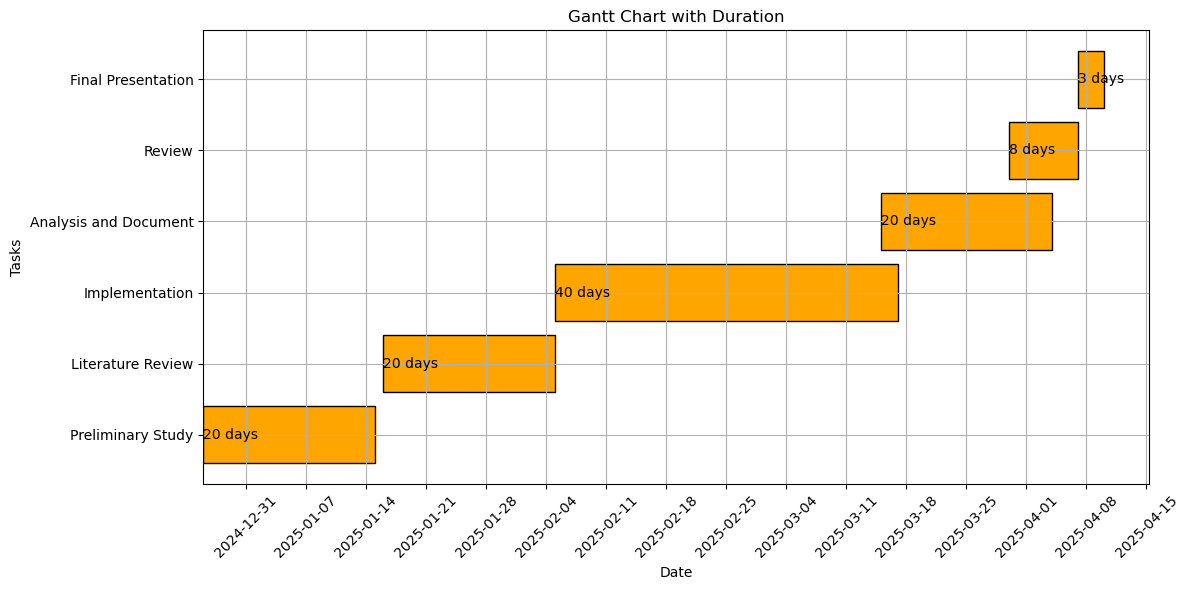

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Provided data
data = {
    'Task': ["Preliminary Study", "Literature Review", "Implementation", "Analysis and Document", "Review", "Final Presentation"],
    'Start Date': ['2024-12-26', '2025-01-16', '2025-02-05', '2025-03-15','2025-03-30', '2025-04-07'],
    'Duration': [20, 20, 40, 20, 8, 3]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Converting the 'Start Date' to datetime
df['Start Date'] = pd.to_datetime(df['Start Date'])

# Calculating the 'End Date'
df['End Date'] = df['Start Date'] + pd.to_timedelta(df['Duration'], unit='d')

# Set up figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each task as a horizontal bar and add duration as a label
for i, task in df.iterrows():
    ax.barh(task['Task'], (task['End Date'] - task['Start Date']).days,
            left=task['Start Date'], color='orange', edgecolor='black')
    ax.text(task['Start Date'], i, f"{task['Duration']} days", va='center')

# Format the date axis
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Tasks')
plt.title('Gantt Chart with Duration')

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.savefig("gantt.png")
plt.show()